# Midterm 1- Mercury Project

## By: Sarah Garner, Alyssa Zamora, Ojas Deshmukh, Logan Carter 

## Table of Contents

- [Introduction](#intro)

  * [Application](#apps)
  * [Assumptions and Formulation](#forms)
  * [Measure of Success](#success)
-[Questions](#qs)

  * [Question 1: Maximum amount of methyl mercury for an adult?](#max)

  * [Question 2: Maximum number of fish a person can eat per month?](#max2)

  * [Question 3: How do the results change if you use the average child, woman, man,
etc.?](#max3)

- [Equilibrium Analysis](#equal)

- [Conclusion](#conclude)
    * [Ethical Considerations](#ethics)

- [Group Member Contributions](#didit)

- [References](#ref)

In [19]:
# Import necessary packages
from IPython.display import HTML, Image
import numpy as np

# import plotting packages
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#powerpoint slides
!pip install RISE

## Introduction

<a id='into' />

#### Application

<a id='apps' />

Summary of Problem:


*   Analyze mercury levels in fish from water

* Determine level of mercury in the human body over adulthood if one fish is eaten per day

* Ensure people are not exceeding safety limits for mercury through fish consumption.

* Fine-tune model to work for individuals of varying body weights





#### Assumptions and Formulation

<a id='forms' />



```
Mercury in Fish

*   Methyl mercury decays 50% every 68 days
*   Tested 3000, all fish contaminated
*   0.4 micrograms of mercury per grams of fish
*   Avg. Weight of fish: 770 g

```

Alyssa Zamora

#### Measure of Success

<a id='success' />


Success:
*   Predict mercury levels after fish consumption
*   Project lethal consequences of consuming contaminated fish
*   Modify model to weight variations





## Questions
<a id='qs' />

#### Question 1

$\textbf{What is the maximum amount of methyl mercury that an adult
will accumulate over their lifetime?}$

<a id='max1' />

Assume that on day zero an adult has no mercury in their system. Let's call the mercury per fish, which equals $770*4*10^{-7}$ grams per fish, $m$. Let's call the rate at which the human body eliminates mercury, $1-\frac{1}{136}$ grams per day, $r$. We will denote the number of fish eaten per day as $q$.

This problem can be modeled by the following difference equation:

$$a_{n+1}=ra_n+mq$$

This can be integrated to find the following solution:

$$a_k=r^k*c+\frac{mq}{1-r}$$

where $c=\frac{-mq}{1-r}$ which equals $-0.00030575182481751826$ when $q=1$.

In [20]:
def mercuryAccum(years, q):                                       # function to check mercury accumulation over the epriod of time 't'
  m = 770*4*10**(-7)*q                                            # 770 gm is the average weight of fish and 4x10^(-6) gm/ per gram of weight of fish
  r= 1-(1/136)                                                    # 'q' represents number of fish consumed per day and 'c' represents the previous term
  c=(-1*m*q)/(1-r)
  print('eq=',-c)

  days = (years*365)-(int(years/4)*365)+(int(years/4)*366)        # number of days from years
  mercury_vec = [0]
  time = [0]

  for i in range(1,days+1):
    l=(r**i*c)+((m*q)/(1-r))
    mercury_vec.append(l)                                         # keeping count of nth term ='l' with respect to period as day where 'i' represents number of days in a list        
    time.append(i)                                                # keeping count of time in terms of 'i' (number of days)

  return time, mercury_vec

In [28]:
# checking results for 104 years to check equilibrium
time1, lifeMercury = mercuryAccum(104,1)                          

# graph of amount of mercury in body with respect to number of days in the mentioned number of years 
fig = go.Figure()
fig.add_trace(go.Scatter(x=time1, y=lifeMercury))

# Edit the layout
fig.update_layout(title='Mercury Accummulation Through Adulthood',
                   xaxis_title='Days',
                   yaxis_title='Grams of Mercury')

fig

eq= 0.04188800000000015


The oldest person to live on record lived to 122 years. You become an adult at 18 years of age. Thus, someone can be an adult for a maximum of 104 years. As demonstrated by the graph above, a person reaches an equilibrium of about $0.04188800000000015$ grams of mercury, which is equal to $a=\frac{mq}{1-r}$ grams of mercury, if they eat one fish per day for 104 years. 

#### Question 2
<a id='max2' />

$\textbf{If the lethal limit to the amount of mercury is 55 mg/kg}$

$\textbf{of body weight, what is the maximum number of fish a person can}$

$\textbf{eat per month (without exceeding the limit)?}$

Our approach was to figure out the maximum number of fish someone could eat per day in order to meet the lethal dose. Then we multiplied the number of fish per day by the number of days in the average month (30) to find the mimimum number of fish one would need to ingest to die of mercury poisoning in one month. Lastly, in order to find the maximum number of fish a person could eat in one month and not die of mercury toxicity we subtracted one fish from the minimum number of fish needed to die of mercury poisoning.

The average person would need to consume 0.055 times their weight in kilograms in grams of mercury in order to die of mercury poisoning. Thus, using our model, we can create the following equation to represent the number of fish a person would have to eat in one month to die from mercury:

$$0.055*weight = r^{30}*\frac{-mq}{1-r}+\frac{mq}{1-r}$$.

We then solved for q, the number of fish eaten per day. This would be equal to:

$$q=\frac{0.055*weight}{\frac{-m}{1-r}+\frac{m}{1-r}}$$.

Then the maximum number of fish that can be eaten in a month without dying is

$$(30*q)-1=\frac{30*0.055*weight}{\frac{-m}{1-r}+\frac{m}{1-r}}-1$$.

In [22]:
def oneMonthtoDie(kgs):                                                         # function to count number of fish needed to be eaten per day before the amount of mercury - 
                                                                                # - in the body is lethal
  m = 770*4*10**(-7)
  r= 1-(1/136)
  b=(-1*m)/(1-r)
  q= (0.055*kgs)/((r**30*b)-b)
  m_0=m*q
  c=b*q

  print('A person weighing',kgs,'kgs can eat', int(q*30)-1, 'fish in a month maximum and not die mercury poisoning.')
  mercury_vec = [0]
  time = [0]
  lethal = [0.055*kgs]

  for i in range(1,31):
    mercury_vec.append((r**i*c)+(m_0/(1-r)))                                    # keeping count of amount of mercury till 31st day
    time.append(i)                                                              # keeping count of time in terms of 'i' (number of days)
    lethal.append(0.055*kgs)                                                    # keeping count of lethal mercury level

  return time, mercury_vec, lethal, q

In [23]:
time2, monthMercury, lethal, q1 = oneMonthtoDie(82)

fig = go.Figure()
fig.add_trace(go.Scatter(x=time2, y=monthMercury, name='Mercury '))
fig.add_trace(go.Scatter(x=time2, y=lethal, name='Lethal Dose'))

# Edit the layout
fig.update_layout(title='Mercury Accummulation in an 82 kg Man Eating 542.117480355628 Fish per Day',
                   xaxis_title='Days',
                   yaxis_title='Grams of Mercury')
fig

A person weighing 82 kgs can eat 16262 fish in a month maximum and not die mercury poisoning.




*   Excessive fish consumption required to reach lethality
*   Avg. person will not die with one fish/ per day
*   Can be modeled with other body masses





#### Question 3
<a id='max3' />

$\textbf{How do your results change if you use the average child, woman, man,
etc.?}$

In [24]:
time2, monthMercury2, lethal2, q2 = oneMonthtoDie(77.3828583)                   #average weight of a woman in the U.S.
time2, monthMercury3, lethal3, q3 = oneMonthtoDie(40.8233133)                   #average weight of a 12-year-old in the U.S.

A person weighing 77.3828583 kgs can eat 15346 fish in a month maximum and not die mercury poisoning.
A person weighing 40.8233133 kgs can eat 8095 fish in a month maximum and not die mercury poisoning.


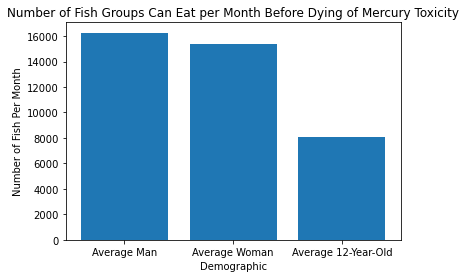

In [25]:
X = ['Average Man','Average Woman','Average 12-Year-Old']
Fperday = [int(q1*30)-1,int(q2*30)-1,int(q3*30)-1]
lethalLimit = [lethal[0],lethal2[0],lethal3[0]]

plt.bar(X, Fperday)
plt.title('Number of Fish Groups Can Eat per Month Before Dying of Mercury Toxicity')
plt.xlabel('Demographic')
plt.ylabel('Number of Fish Per Month')
plt.show()

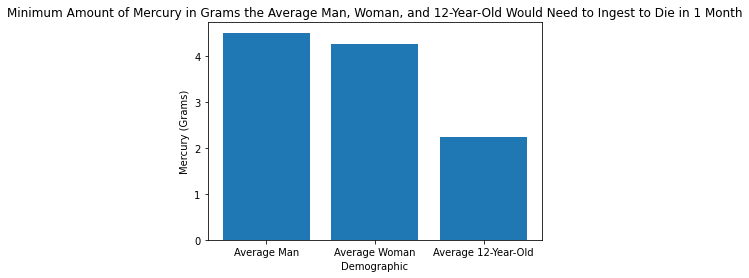

In [26]:
plt.bar(X, lethalLimit)
plt.title('Minimum Amount of Mercury in Grams the Average Man, Woman, and 12-Year-Old Would Need to Ingest to Die in 1 Month')
plt.xlabel('Demographic')
plt.ylabel('Mercury (Grams)')
plt.show()

## Equilibrium Analysis

<a id='equal' />

The eqilibrium is equal to $\frac{mq}{1-r}$. Thus, the equilibrium is dependent on the number of fish eaten per day ($q$), as well as the amount of mercury in each fish and the rate at which the human body disposes of mercury. The graph below demonstrates how varying values of $q$ affect the point of equilibrium.

In [27]:
x1, eq1 = mercuryAccum(5,1)           # mercury accumulation considering one fish consumed on average per day
x2, eq2 = mercuryAccum(5,2)           # mercury accumulation considering two fish consumed on average per day
x3, eq3 = mercuryAccum(5,5)           # mercury accumulation considering five fish consumed on average per day
x4, eq4 = mercuryAccum(5,10)          # mercury accumulation considering ten fish consumed on average per day

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x1, y=eq1, name='One Fish Per Day'))
fig2.add_trace(go.Scatter(x=x2, y=eq2, name='Two Fish Per Day'))
fig2.add_trace(go.Scatter(x=x3, y=eq3, name='Five Fish Per Day'))
fig2.add_trace(go.Scatter(x=x4, y=eq4, name='Ten Fish Per Day'))

# Edit the layout
fig2.update_layout(title='Mercury Accumulation Over Five Years by Rate of Fish Consumption',
                   xaxis_title='Days',
                   yaxis_title='Grams of Mercury')
fig2

eq= 0.04188800000000015
eq= 0.1675520000000006
eq= 1.0472000000000037
eq= 4.188800000000015




```
# This is formatted as code
```

##Conclusion

<a id='conclude' />



*   Lethality not primary concern
*   Further research: non-lethal mercury poisoning
*   Variations do occur



#### Ethical Considerations

<a id='ethics' />


* Majority of model focuses around individuals with average weight
* Model doesn't account for individuals with mercury already in their system, especially from sources other than fish
* Model doesn't consider individuals with health concerns who can't handle as much mercury as a result
* Conclusion of lethality may prevent immediate action



## Group Member Contributions

<a id='didit' />

$\textbf{Ojas:}$ Created the difference equations. Worked on questions 1-3 with other members of the group.

$\textbf{Alyssa:}$ Authored the Introduction and conclusion sections.

$\textbf{Logan:}$ Worked on questions 1-3 with other members of the group.

$\textbf{Sarah:}$ Worked on questions 1-3 with the other members of the group and completed the equilibrium analysis. I also made all of the pretty pictures. :D

## References

<a id='ref' />